# CoE 197M HW 1 (Positional Encoding)
### Jan Marvin D. Moyco, 2015-09359

#### Position Matrix
The positional encoding as defined in [this paper](https://arxiv.org/pdf/1706.03762.pdf) uses an interweaved sin and cosine functions as a way to store positional information. The angle for the sine and cosine functions are also explained in [this github page](https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb) This position matrix **P** $\in \Re ^{pos \,x \,i} $ is defined by:

$$angle\_rate_{d}\,=\,(min\_rate)^{\frac{i}{d_{model}}}$$

$$PE_{(pos,2i)}\,=\, sin(\frac{pos}{5000^{\frac{i}{d_{model}}}})$$

$$PE_{(pos,2i+1)}\,=\, cos(\frac{pos}{5000^{\frac{i}{d_{model}}}})$$

Where $pos = 0,.....,2\pi$ is the position and $i = 0,....,[\frac{d_{model}}{2}]$ is the dimension where each dimension of the matrix (columns) corresponds to a sinusoid (sin function for even and cos function for odd dimension). The i vector (where the 0 to $2\pi$) are distributed are separated into equal cells of 8 (since i has a length of dmodel/2). Also, the min_rate( frequency) used was 5 kHz

###### Importing important modules to be used.

In [176]:
import numpy as np
import matplotlib.pyplot as plt

#### Functions created for this notebook

##### The functions sin_val(pos,i,dmodel)  and cos_val(pos,i,dmodel)  
These functions computes the value of the element in the positional encoding vector for either sin (even) or cos (odd). 

In [199]:
def sin_val(pos,i,dmodel):
    #When the pos is even (use sin)
    sinval = np.sin(pos/(np.power(5000,((i)/dmodel))))
    return sinval

def cos_val(pos,i,dmodel):
    #When the pos is odd (use cos)
    cosval = np.cos(pos/(np.power(5000,((i)/dmodel))))
    return cosval

##### The function create_PE(pos,dmodel) 
This function creates the positional encoding matrix by using the previously created function and interweaving the result in a matrix size of pos x dmodel

In [200]:
def create_PE(pos,dmodel):
    init_matrix = np.zeros((pos,dmodel))
    starting_pos = np.arange(pos)[:,np.newaxis]
    starting_i = np.arange(dmodel//2)[np.newaxis,:]
    starting_i = starting_i*(np.pi/4)               #Creating the list of 0 - 2pi range (for angle rates)
    #Getting the values of the matrix by using list (created from arange()) to get all the values at once (avoiding loops)
    init_matrix[:,0::2] = sin_val(starting_pos,starting_i,dmodel)
    init_matrix[:,1::2]= cos_val(starting_pos,starting_i,dmodel)              
    PE_matrix = init_matrix.reshape(1,pos,dmodel)
    return PE_matrix

#### Creation of the matrix
This part will be the creation of the positional encoding matrix using the specifications of pos = 16, i = 16, dmodel = 16
Main Reference: [github.io/jalammar](https://github.com/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb)

In [201]:
pos = 16
dmodel = 16
i = 16
PE_matrix = create_PE(pos,dmodel)
PE_matrix.shape

(1, 16, 16)

#### Check the matrix if it is orthogonal and/or orthonormal
This part, the positional matrix will be evaluated if it is an orthonormal basis matrix meaning:
* The basis vectors (columns) are orthogonal to each other; and
* The vectors are normalized
The property of an orthogonal matrix will be used to check the positional encoding matrix since the matrix created is a 16 x 16 matrix. This property of an orthogonal matrix says: "A square matrix $A\, \in \, \Re ^{n\,x\,n}$ is orthogonal is the columns are orthonormal":


$$ AA^{T} \, = \, A^{T}A = I $$

Implication: $A^{-1} = A^{T}$
This means that if the inverse of the positional encoding matrix is equal to its transpose, then the matrix can be said to be orthogonal and the column vectors are orthonormal. Reference: [This github page](https://github.com/roatienza/ml/blob/master/analytic_geometry/Analytic_Geometry.pdf)

In [202]:
inv_PE_matrix = np.linalg.inv(PE_matrix)
trans_PE_matrix = PE_matrix.T.reshape(1,16,16)
np.allclose(np.linalg.inv(PE_matrix),PE_matrix.T)

False

Since the inverse and the transpose of the matrix are not equal, the column vectors are not orthonormal. The matrix  has to undergo the Gram-Schmidt Process to become orthonormal.

#### QR Decomposition
This method is applicable to PE_matrix since it is a square matrix and not orthogonal. The QR Decomposition states that any real square matrix A can be decomposed as:

$$ A \, = \, QR $$

Where A is the input matrix, Q is the orthogonal matrix (meaning the columns are orthonormal), and R is the upper triangular matrix (the lower half of the diagonal line is zeros). 

In [203]:
q,r = np.linalg.qr(PE_matrix.reshape(16,16)) #Numpy's function for QR decomposition
PE_orthogonal = q.reshape(1,16,16)  #Reshaping the orthogonal matrix
r = r.reshape(1,16,16)  #Reshaping the upper triangular matrix
PE_orthogonal.shape

(1, 16, 16)

#### Checking the resulting matrix 
After the QR decomposition, the matrix is verified again using the property of the orthogonal matrix as before.

In [204]:
inv_PE_orthogonal = np.linalg.inv(PE_orthogonal)
trans_PE_orthogonal = np.transpose(PE_orthogonal).reshape(1,16,16)
np.allclose(inv_PE_orthogonal,trans_PE_orthogonal)
#trans_PE_orthogonal.shape

True

Since the inverse and the transpose of the PE_orthogonal is equal, the matrix can now be said to be orthogonal and its vectors are orthonormal.

#### Output: Initial Positional Encoding Matrix
The figure below shows the colored visualization of the positional encoding matrix.

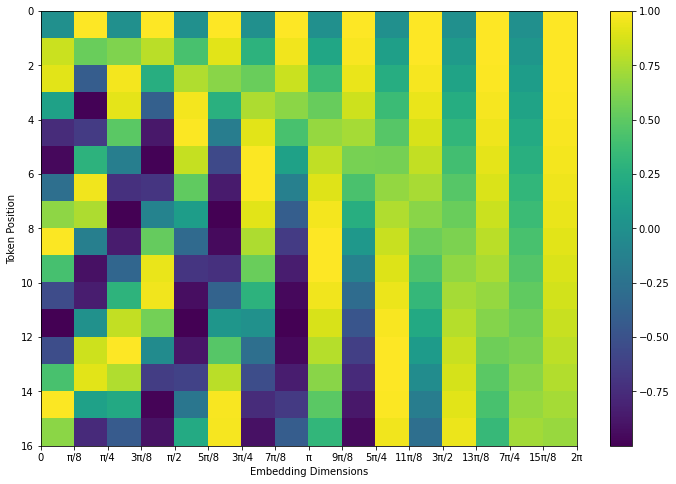

In [205]:
pi_ticks=['0','π/8','π/4','3π/8','π/2','5π/8','3π/4','7π/8','π','9π/8','5π/4','11π/8','3π/2','13π/8','7π/4','15π/8','2π']
plt.figure(figsize=(12,8))
plt.pcolormesh(PE_matrix[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dmodel ))
plt.ylim((pos,0))
plt.xticks(np.arange(17),pi_ticks)
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

#### Output: Orthogonal Positional Encoding Matrix
The figures below shows the colored visualization of the positional encoding matrix.


##### QR Decomposition

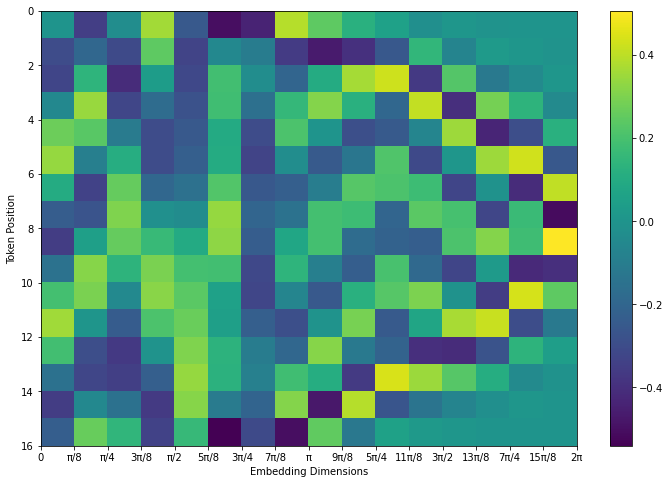

In [206]:
plt.figure(figsize=(12,8))
plt.pcolormesh(PE_orthogonal[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dmodel ))
plt.ylim((pos,0))
plt.xticks(np.arange(17),pi_ticks)
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

##### Plot of the Inverse of the Orthogonal Basis Matrix

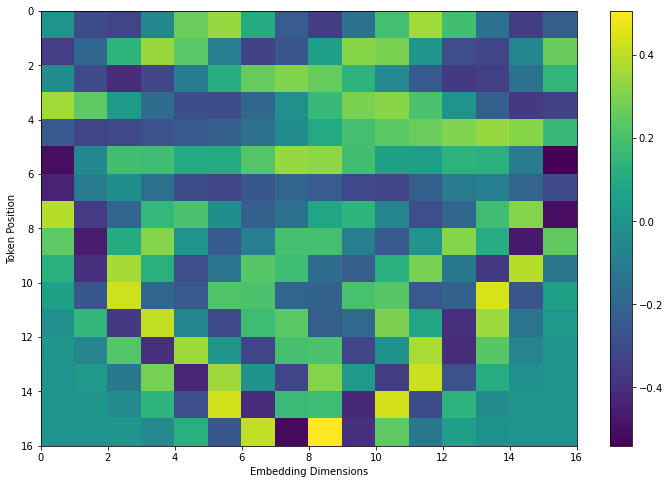

In [207]:
plt.figure(figsize=(12,8))
plt.pcolormesh(inv_PE_orthogonal[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dmodel ))
plt.ylim((pos,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

##### Plot of the Transpose of the Orthogonal Basis Matrix

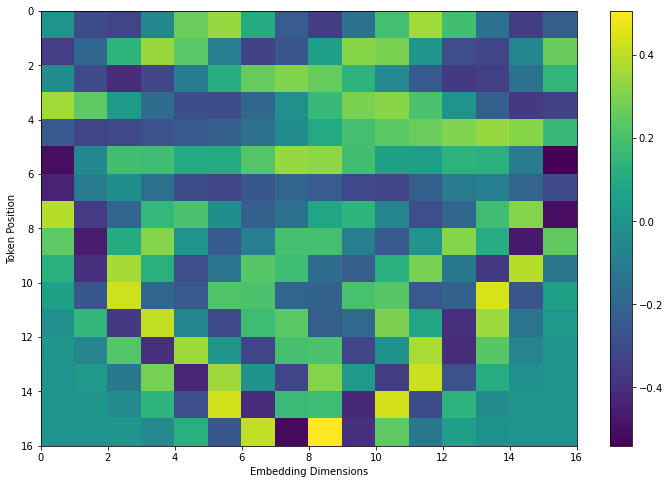

In [208]:
plt.figure(figsize=(12,8))
plt.pcolormesh(trans_PE_orthogonal[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dmodel ))
plt.ylim((pos,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()